In [39]:
import os, sys, pyodbc
import pandas as pd
import pandas.io.sql as psql

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

mpl.rcParams['figure.figsize'] = (18, 10)

sns.set_style()

### Carregando os datasets

In [29]:
pyodbc.autocommit = True
con = pyodbc.connect("DSN=HiveDSN", autocommit = True)

cursor = con.cursor()

sql = "SELECT * FROM equipe.bd_consumo_data_float_por_dia"

dfcons = psql.read_sql(sql, con)

dfcons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datacompleta  3346 non-null   object 
 1   seco          3346 non-null   float64
 2   s             3346 non-null   float64
 3   ne            3346 non-null   float64
 4   n             3346 non-null   float64
 5   sin           3346 non-null   float64
dtypes: float64(5), object(1)
memory usage: 157.0+ KB


In [30]:
dfcons.isna().sum()

datacompleta    0
seco            0
s               0
ne              0
n               0
sin             0
dtype: int64

In [31]:
dfcons.describe()

,seco,s,ne,n,sin
count,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000
mean,36732.248356,11003.934848,10180.465929,5343.063060,63259.697250
std,3798.423905,1567.876552,889.883072,478.038405,6183.151743
min,26357.000000,6552.000000,7583.000000,3564.000000,46526.000000
25%,34272.750000,10137.250000,9561.000000,5116.000000,59494.750000
50%,36649.500000,11061.500000,10123.000000,5361.500000,63222.500000
75%,39450.500000,11985.000000,10802.750000,5637.750000,67759.750000
max,46702.000000,16383.000000,12794.000000,6765.000000,80547.000000


In [34]:
dfcons.head(10)

,datacompleta,seco,s,ne,n,sin
0,2013-01-01,29850.0,6552.0,7583.0,3564.0,47549.0
1,2013-01-02,36604.0,8364.0,8979.0,3806.0,57753.0
2,2013-01-03,37330.0,9471.0,9428.0,3903.0,60132.0
3,2013-01-04,37248.0,10107.0,9406.0,3931.0,60693.0
4,2013-01-05,35165.0,9369.0,8993.0,3843.0,57369.0
5,2013-01-06,32907.0,8115.0,8305.0,3742.0,53069.0
6,2013-01-07,39290.0,10534.0,9388.0,4033.0,63245.0
7,2013-01-08,41221.0,10822.0,9596.0,4006.0,65645.0
8,2013-01-09,40655.0,11062.0,9674.0,3979.0,65369.0
9,2013-01-10,38982.0,10948.0,9770.0,3925.0,63624.0


In [36]:
sql = "SELECT * FROM  equipe.bd_estacoes_regiao_seco_minmax_por_dia"

dfcidades_seco = psql.read_sql(sql, con)
dfcidades_seco.info(), dfcidades_seco.isna().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datacompleta  3346 non-null   object 
 1   precmax       3346 non-null   float64
 2   tempmax       3346 non-null   float64
 3   tempmin       3346 non-null   float64
 4   umidmax       3346 non-null   float64
 5   umidmin       3346 non-null   float64
dtypes: float64(5), object(1)
memory usage: 157.0+ KB


(None,
 datacompleta    0
 precmax         0
 tempmax         0
 tempmin         0
 umidmax         0
 umidmin         0
 dtype: int64)

In [37]:
dfcidades_seco.describe(), dfcidades_seco.head(10)

(           precmax      tempmax      tempmin      umidmax      umidmin
 count  3346.000000  3346.000000  3346.000000  3346.000000  3346.000000
 mean     14.350448    35.061327    14.268858    98.326360    27.408249
 std      13.275603     2.315003     3.257857     1.655865     9.293042
 min       0.000000    24.900000    -0.700000    82.000000     7.000000
 25%       3.250000    33.599998    12.200000    97.000000    20.000000
 50%      11.400000    34.700001    15.100000    98.000000    28.000000
 75%      21.600000    36.400002    16.799999   100.000000    34.000000
 max      97.199997    43.700001    19.600000   100.000000    55.000000,
   datacompleta    precmax    tempmax    tempmin  umidmax  umidmin
 0   2013-01-01  23.400000  33.700001  18.100000     96.0     27.0
 1   2013-01-02   9.600000  34.400002  18.000000     96.0     24.0
 2   2013-01-03  12.000000  34.700001  17.100000     96.0     22.0
 3   2013-01-04  17.799999  33.299999  17.700001     96.0     32.0
 4   2013-01-05 

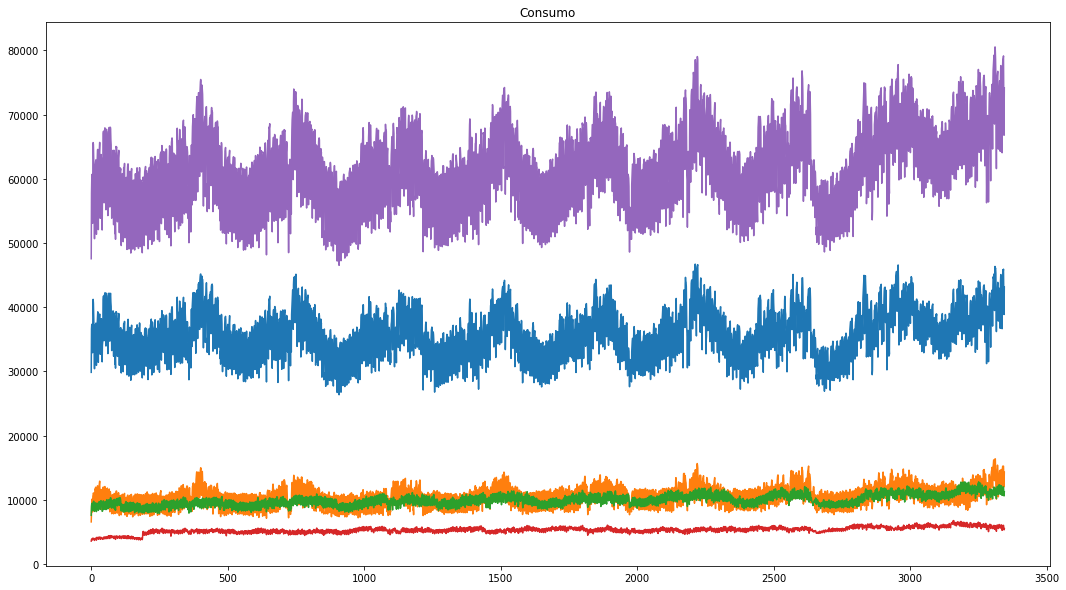

In [13]:
dfcons.plot(title='Consumo', legend=False);

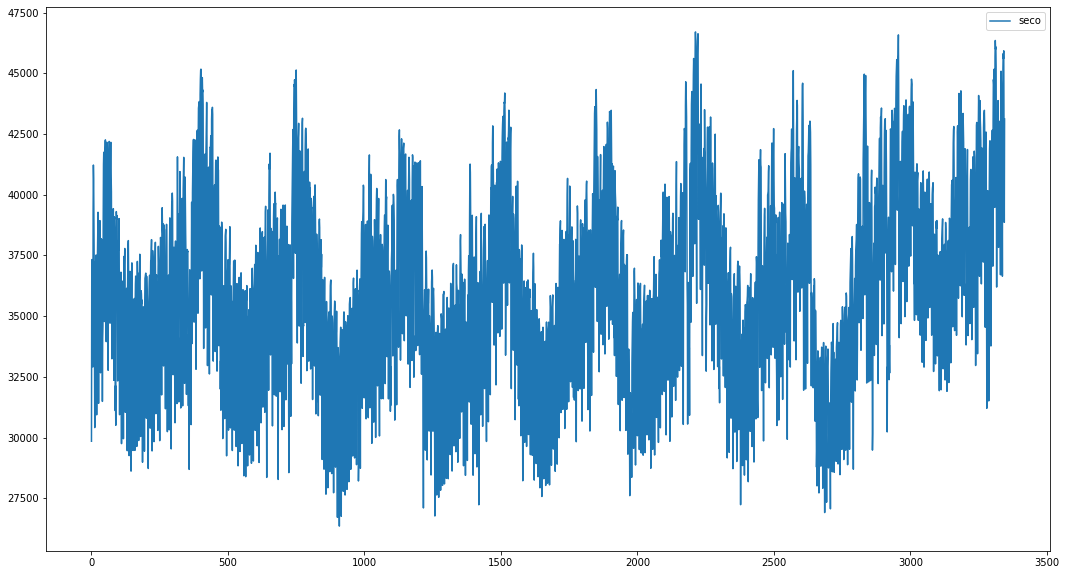

In [21]:
dfcons_seco = dfcons[['seco']].copy()
dfcons_seco.plot();


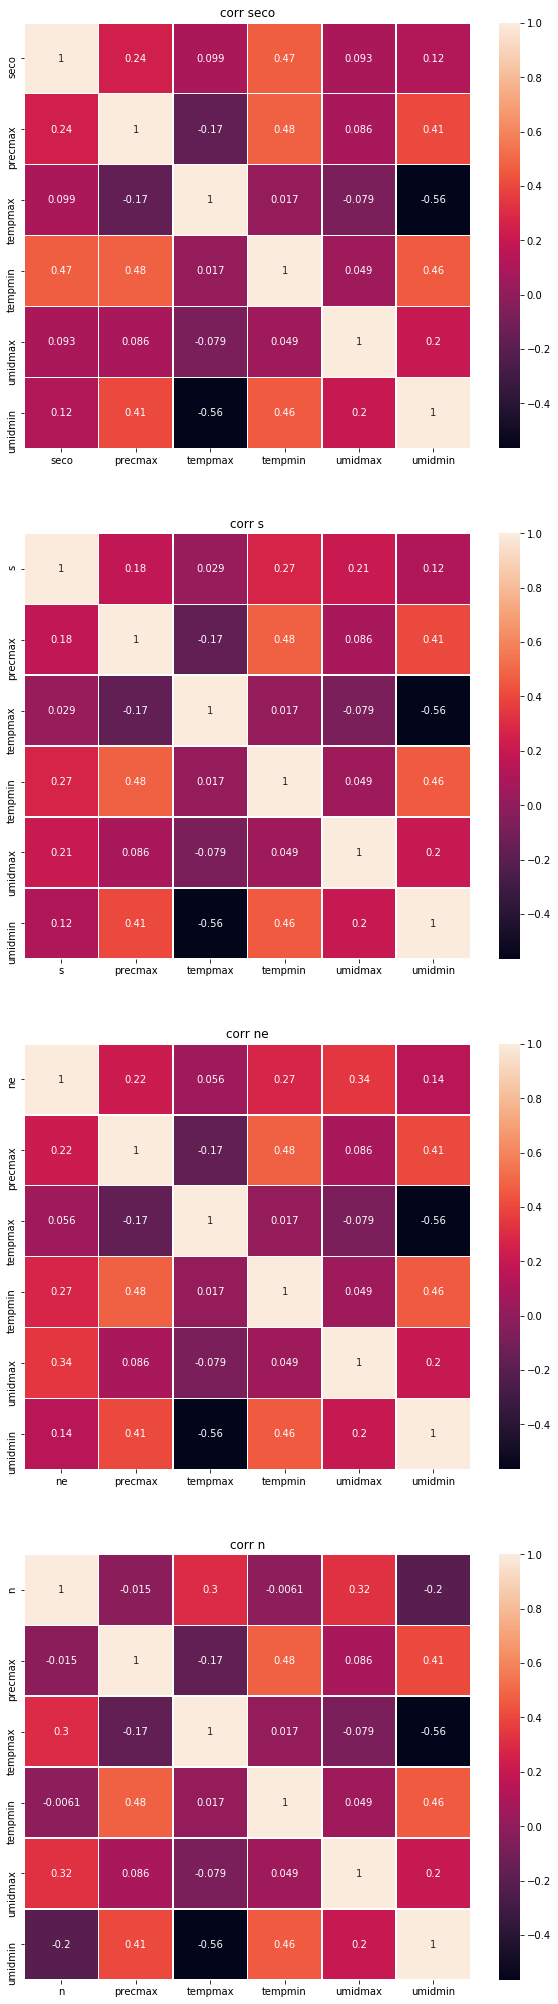

In [41]:
fig, axes = plt.subplots(4, 1, figsize=(10, 36))
submercados = dfcons.columns[1:-1]

for sub, ax in zip(submercados, [*axes]):
    temp_df = pd.concat([dfcons[sub], dfcidades_seco.iloc[:, 1:]], axis="columns")
    sns.heatmap(
        temp_df.corr(),
        cbar=True,
        linewidths=.5,
        annot=True, ax=ax
    )
    ax.set_title(f"corr {sub}" )